## **주요 개념 정리**

- k-최근접 이웃 분류기 : KNN Classification
### 다중 분류 multi-class classification
- 이진 분류와 모델을 만들고 훈련하는 방식은 동일
- 이진 분류에서는 양성 클래스와 음성 클래스를 각각 1과 0으로 지정하여 타깃 data를 만들었었음
- 다중 분류에서도 타깃값을 숫자로 바꾸어 입력할 수 있지만 사이킷런에서는 문자열로 된 타깃값을 그대로 사용할 수 있음
- 이때, 타깃값을 그대로 사이킷런 모델에 전달하면 순서가 자동으로 알파벳 순으로 매겨진다. => pd.unique(fish['species'])로 출력했던 순서와 차이가 생김

- **KNeighborsClassifier에서 정렬된 타깃값은 classes_ 속성에 저장되어 있음**
- predict_proba() 메서드로 클래스별 확률값을 반환
- kneighbors() 메서드의 입력은 항상 2차원 배열이어야만 함
- 이를 위해, numpy 배열의 슬라이싱 연산자 사용 => 슬라이싱 연산자는 하나의 샘플만 선택해도 항상 2차원 배열이 만들어짐

## Logistic Regression
- 선형 회귀와 동일하게 선형 방정식을 학습함
- z = (a) x (feature1) + (b) x (feature2) + ... + f
- 위의 z 값을 **sigmoid function 시그 모이드 함수**에 넣는다. => 이진 분류에 사용



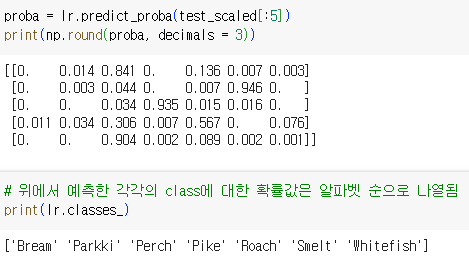

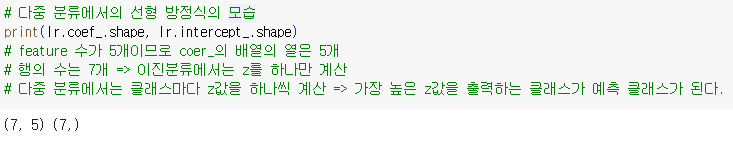

## in 다중 분류 **Softmax 함수** 사용
- 정규화된 지수 함수라고도 부름
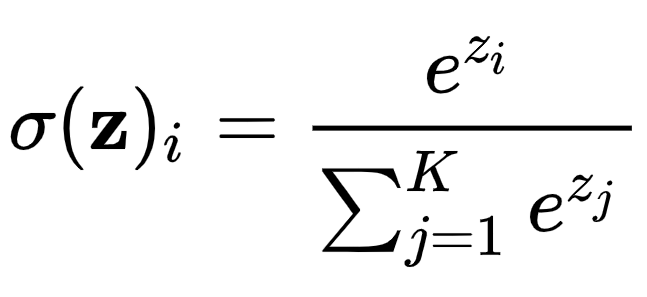
[Softmax 함수에서 e를 사용하는 이유 : 미분이 깔끔해서](https://lv99.tistory.com/7)

- 여러개의 선형 방정식의 출력값을 0 ~ 1 사이로 압축하고 전체 합이 1이 되도록 만든다.

> **코드 실행 중 발생한 오류 분석**
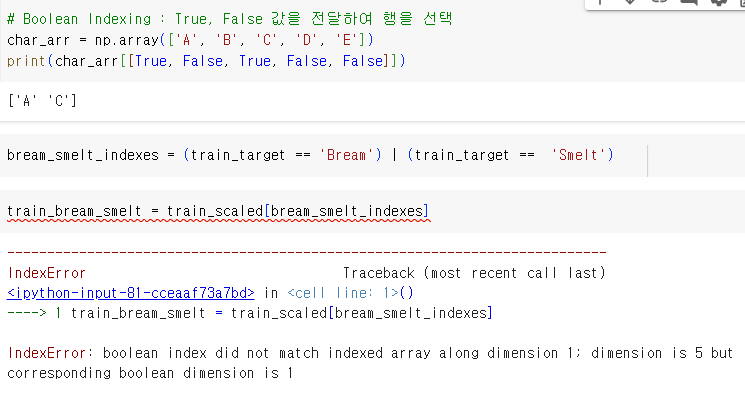



```python
# 대괄호를 1개만 사용해서 인덱싱해야 하는데, 2개 사용해서 문법 상의 오류는 발생하지 않았는데, 이후의 boolean indexing이 불가능하게 됐다.
fish_target = fish[['Species']].to_numpy()
```

In [86]:
# pandas는 csv의 첫 줄을 자동으로 인식해 열 제목으로 만들어 준다
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [87]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [88]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

In [89]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [90]:
fish_target = fish['Species'].to_numpy()

In [91]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [92]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [93]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [94]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [95]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [96]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [97]:
# kneighbors() 메서드의 입력은 항상 2차원 배열이어야만 함
# 이를 위해, numpy 배열의 슬라이싱 연산자 사용 => 슬라이싱 연산자는 하나의 샘플만 선택해도 항상 2차원 배열이 만들어짐
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


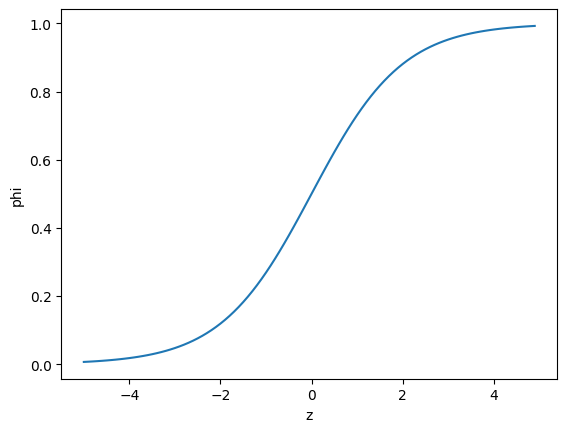

In [98]:
# Logistic Regression
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5,5,0.1)
phi = 1 / (1+np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [112]:
# Boolean Indexing : True, False 값을 전달하여 행을 선택
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [116]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target ==  'Smelt')

In [117]:
train_bream_smelt = train_scaled[bream_smelt_indexes]

In [118]:
target_bream_smelt = train_target[bream_smelt_indexes]

In [120]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [121]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [122]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [123]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [124]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)
# 양성 클래스에 대한 z값 반환

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [125]:
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [126]:
lr = LogisticRegression(C = 20, max_iter = 1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [127]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [128]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [129]:
# 위에서 예측한 각각의 class에 대한 확률값은 알파벳 순으로 나열됨
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [130]:
# 다중 분류에서의 선형 방정식의 모습
print(lr.coef_.shape, lr.intercept_.shape)
# feature 수가 5개이므로 coer_의 배열의 열은 5개
# 행의 수는 7개 => 이진분류에서는 z를 하나만 계산
# 다중 분류에서는 클래스마다 z값을 하나씩 계산 => 가장 높은 z값을 출력하는 클래스가 예측 클래스가 된다.

(7, 5) (7,)


#### **Boolean Indexing**
- 데이터 전처리 단계에서, == (equal), != (not equal), & (and), | (or) 등의 조건문 연산자를 활용해서 indexing & slicing 해야할 때 사용

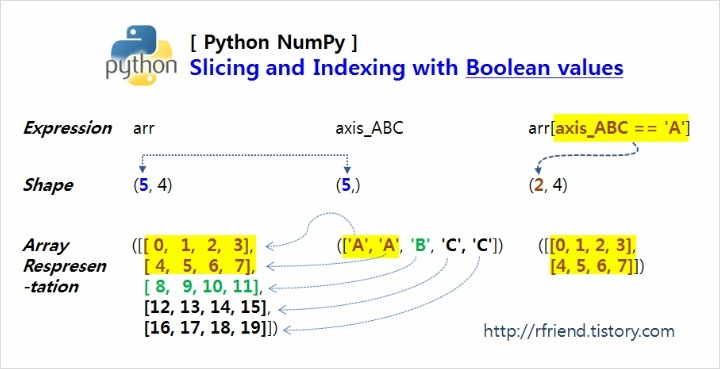

In [103]:
import numpy as np
arr = np.arange(20).reshape(5,4)
print(arr)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]


In [105]:
# boolean 조건값으로 사용할 배열 만들기
# 예시에서 arr 배열의 shape이 (5,4)이므로 행(row)의 5에 맞추어
# 5개의 원소로 구성된 배열 만들기

axis_ABC = np.array(['A','A','B','C','C'])
axis_ABC

array(['A', 'A', 'B', 'C', 'C'], dtype='<U1')

In [106]:
# axis_ABC == 'A' 인 행 전체를 배열 'arr'로 부터 indexing
axis_ABC == 'A'

array([ True,  True, False, False, False])

In [108]:
arr[axis_ABC == 'A']
# 전체 열을 같이 indexing 해오라고 지시하기 위해
# 콤마(comma) ','와 콜론 (colon) ':' 을 사용해도 되고, 생략해도 됨
# ex) arr[axis_ABC == 'A', : ]

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [109]:
# 복수의 boolean 조건문 사용
arr[(axis_ABC == 'A') | (axis_ABC == 'B')]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [111]:
arr[[ True,  True, False, False, False]]

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [132]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals = 2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [134]:
from scipy.special import softmax
proba = softmax(decision, axis = 1) # axis = 1 => 각 행별로 계산
print(np.round(proba, decimals = 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
